
Made by: Andrei Kulchyk (155489) and Fiodar Piatrovich (155174)

[Github](https://github.com/aaakulchyk/put-evolutionary-computations)

# Description of a problem

We are given three columns of integers with a row for each node. The first two columns contain x and y coordinates of the node positions in a plane. The third column contains node costs. The goal is to select exactly 50% of the nodes (if the number of nodes is odd we round the number of nodes to be selected up) and form a Hamiltonian cycle (closed path) through this set of nodes such that the sum of the total length of the path plus the total cost of the selected nodes is minimized.

The distances between nodes are calculated as Euclidean distances rounded mathematically to
integer values. The distance matrix should be calculated just after reading an instance and then only
the distance matrix (no nodes coordinates) should be accessed by optimization methods to allow
instances defined only by distance matrices.

In [1]:
## Implementation

In [2]:
### Dependencies

In [3]:
from dotenv import load_dotenv

_ = load_dotenv()

In [1]:
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from hamiltonian_cycle.costs import (
    dm,
)
from hamiltonian_cycle.experiment import perform_experiment
from hamiltonian_cycle.algorithms.lab2 import (
    init_greedy_2regret_cycle,
    init_greedy_2regret_weighted_cycle,
)
from hamiltonian_cycle.algorithms.lab1 import (
    init_nearest_neighbor_best_position,
    init_nearest_neighbor_end,
    init_random_solution,
    init_greedy_cycle,
)

import warnings

In [2]:
plt.style.use("ggplot")

warnings.filterwarnings("ignore")

SUBSET_RATIO = 0.5
SEED: int = 369_420

random.seed(SEED)
np.random.seed(SEED)

In [3]:
### Read Data

In [4]:
def read_dataset_csv(csv_path: Path) -> pd.DataFrame:
    return pd.read_csv(csv_path, sep=";", names=["x", "y", "cost"])


DATA_DIR = Path("../data").resolve()

In [5]:
ds_a = read_dataset_csv(DATA_DIR / "TSPA.csv")
ds_b = read_dataset_csv(DATA_DIR / "TSPB.csv")

dm_a = dm(ds_a)
dm_b = dm(ds_b)

In [17]:
init_greedy_2regret_weighted_cycle(ds_a, dm_a, 0, 0.5, 0.5)

,x,y,cost
0,1355,1796,496
117,1199,1948,611
143,1417,1961,424
183,1838,1943,43
89,1922,1845,754
...,...,...,...
41,550,1241,379
193,501,1290,5
139,772,1422,150
68,922,1647,785


# Heuristics

## Greedy 2-regret

$$
\begin{aligned}
&\textbf{Function Greedy\_2\_regret\_heuristics}(dataset, distance\_matrix, start\_node): \\
&\quad \text{size} \gets \text{determine subset size based on dataset length and a fixed ratio} \\
&\quad \text{num\_nodes} \gets \text{total number of nodes (rows in dataset)} \\
&\quad \text{Copy the distance matrix to avoid modifying the original} \\
&\quad \text{remaining\_nodes} \gets \text{all nodes except the start\_node} \\
&\quad \text{solution} \gets [start\_node] \\
&\quad \text{nearest\_node} \gets \text{find the nearest node to start\_node based on distance matrix} \\
&\quad \text{Add nearest\_node to solution and remove it from remaining\_nodes} \\
&\quad \textbf{While the solution size is smaller than the subset size}: \\
&\quad \quad \text{best\_regret} \gets -\infty \\
&\quad \quad \text{best\_node} \gets \text{None} \\
&\quad \quad \text{best\_insertion} \gets \text{None} \\
&\quad \quad \textbf{For each node in remaining\_nodes}: \\
&\quad \quad \quad \text{best\_cost} \gets \infty \\
&\quad \quad \quad \text{second\_best\_cost} \gets \infty \\
&\quad \quad \quad \text{best\_position} \gets \text{None} \\
&\quad \quad \quad \textbf{For each position in the current solution}: \\
&\quad \quad \quad \quad \text{Calculate the cost of inserting the node between two positions in solution} \\
&\quad \quad \quad \quad \textbf{If the current cost} < \text{best\_cost}: \\
&\quad \quad \quad \quad \quad \text{second\_best\_cost} \gets \text{best\_cost} \\
&\quad \quad \quad \quad \quad \text{best\_cost} \gets \text{current\_cost} \\
&\quad \quad \quad \quad \quad \text{best\_position} \gets \text{current insertion point} \\
&\quad \quad \quad \quad \textbf{Else If the current cost} < \text{second\_best\_cost}: \\
&\quad \quad \quad \quad \quad \text{second\_best\_cost} \gets \text{current\_cost} \\
&\quad \quad \quad \text{Calculate the regret} \gets \text{second\_best\_cost} - \text{best\_cost} \\
&\quad \quad \quad \textbf{If the regret} > \text{best\_regret}: \\
&\quad \quad \quad \quad \text{best\_regret} \gets \text{regret} \\
&\quad \quad \quad \quad \text{best\_node} \gets \text{current node} \\
&\quad \quad \quad \quad \text{best\_insertion} \gets \text{current insertion point} \\
&\quad \quad \text{Insert best\_node into the solution after best\_insertion point} \\
&\quad \quad \text{Remove best\_node from remaining\_nodes} \\
&\quad \textbf{Return} \text{the final solution based on dataset order}
\end{aligned}
$$


#### Dataset A

Best solution: [196, 157, 188, 113, 171, 16, 78, 25, 44, 120, 82, 129, 92, 57, 172, 2, 75, 86, 26, 121, 182, 53, 158, 154, 6, 135, 194, 127, 123, 24, 156, 4, 190, 177, 104, 54, 48, 34, 192, 181, 146, 22, 20, 134, 18, 69, 67, 140, 68, 110, 142, 41, 96, 42, 43, 77, 65, 197, 115, 198, 46, 60, 118, 109, 151, 133, 79, 80, 176, 66, 141, 0, 153, 183, 89, 23, 186, 114, 15, 148, 9, 61, 73, 132, 21, 14, 49, 178, 52, 185, 119, 165, 39, 95, 7, 164, 71, 27, 90, 81]
Objective function statistics:
minimum = 105692
mean = 115579.335
maximum = 126951


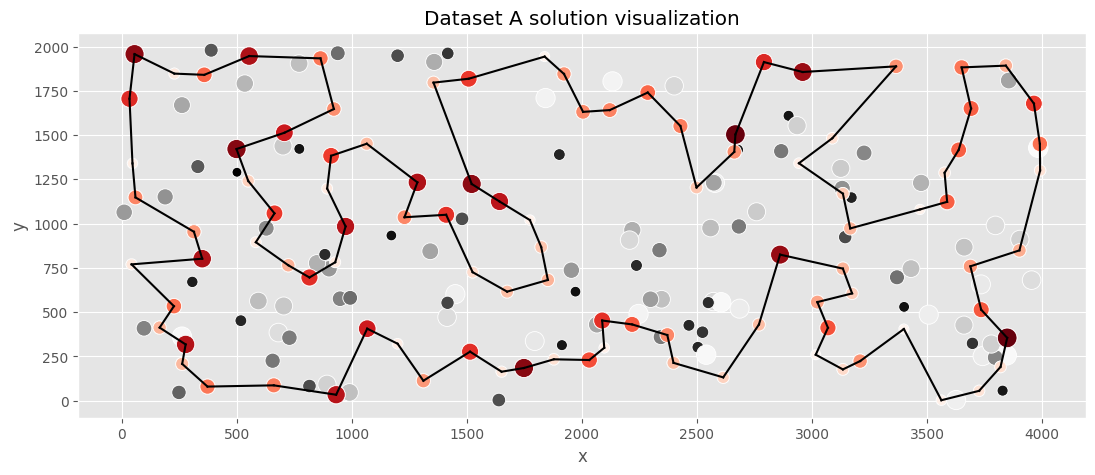

In [9]:
perform_experiment(
    ds_a, dm_a, "Dataset A solution visualization", init_greedy_2regret_cycle
)

#### Dataset B

Best solution: [18, 34, 174, 183, 9, 99, 185, 179, 172, 57, 66, 47, 60, 20, 59, 28, 4, 53, 170, 184, 155, 84, 70, 132, 169, 188, 6, 192, 134, 2, 74, 118, 98, 51, 120, 71, 178, 10, 44, 17, 107, 100, 63, 102, 135, 131, 121, 112, 19, 173, 31, 117, 198, 24, 1, 27, 42, 196, 108, 80, 162, 142, 5, 123, 7, 36, 79, 91, 141, 97, 77, 58, 82, 68, 104, 33, 49, 29, 0, 41, 143, 119, 153, 186, 163, 103, 127, 137, 75, 93, 48, 166, 194, 180, 64, 86, 110, 128, 124, 62]
Objective function statistics:
minimum = 67809
mean = 72740.005
maximum = 78406


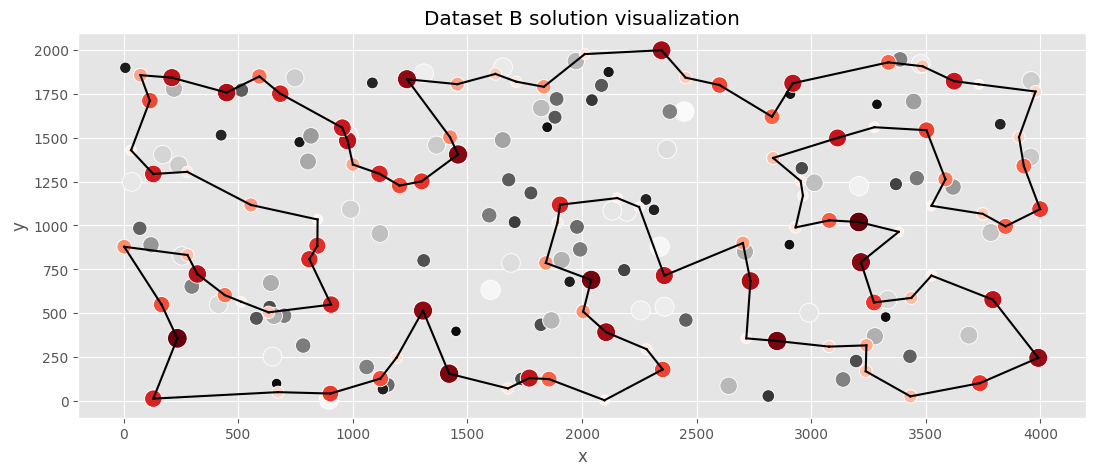

In [10]:
perform_experiment(
    ds_b, dm_b, "Dataset B solution visualization", init_greedy_2regret_cycle
)

## Greedy heuristics with a weighted sum criterion

$$
\begin{aligned}
&\textbf{Function Greedy\_heuristics\_with\_weighted\_sum}(dataset, distance\_matrix, start\_node, w\_cost, w\_regret): \\
&\quad \text{size} \gets \text{determine subset size as half of the dataset length} \\
&\quad \text{num\_nodes} \gets \text{total number of nodes (rows in dataset)} \\
&\quad \text{Copy the distance matrix to avoid modifying the original} \\
&\quad \text{remaining\_nodes} \gets \text{all nodes except the start\_node} \\
&\quad \text{solution} \gets [start\_node] \\
&\quad \text{nearest\_node} \gets \text{find the nearest node to start\_node based on distance matrix} \\
&\quad \text{Add nearest\_node to solution and remove it from remaining\_nodes} \\
&\quad \textbf{While the solution size is smaller than the subset size}: \\
&\quad \quad \text{best\_combined\_criterion} \gets \infty \\
&\quad \quad \text{best\_node} \gets \text{None} \\
&\quad \quad \text{best\_insertion} \gets \text{None} \\
&\quad \quad \textbf{For each node in remaining\_nodes}: \\
&\quad \quad \quad \text{best\_cost} \gets \infty \\
&\quad \quad \quad \text{second\_best\_cost} \gets \infty \\
&\quad \quad \quad \text{best\_position} \gets \text{None} \\
&\quad \quad \quad \textbf{For each position in the current solution}: \\
&\quad \quad \quad \quad \text{Calculate the cost of inserting the node between two positions in solution} \\
&\quad \quad \quad \quad \textbf{If the current cost} < \text{best\_cost}: \\
&\quad \quad \quad \quad \quad \text{second\_best\_cost} \gets \text{best\_cost} \\
&\quad \quad \quad \quad \quad \text{best\_cost} \gets \text{current\_cost} \\
&\quad \quad \quad \quad \quad \text{best\_position} \gets \text{current insertion point} \\
&\quad \quad \quad \quad \textbf{Else If the current cost} < \text{second\_best\_cost}: \\
&\quad \quad \quad \quad \quad \text{second\_best\_cost} \gets \text{current\_cost} \\
&\quad \quad \quad \text{Calculate the regret} \gets \text{second\_best\_cost} - \text{best\_cost} \\
&\quad \quad \quad \text{combined\_criterion} \gets \text{w\_cost} \times \text{best\_cost} - \text{w\_regret} \times \text{regret} \\
&\quad \quad \textbf{If combined\_criterion} < \text{best\_combined\_criterion}: \\
&\quad \quad \quad \text{best\_combined\_criterion} \gets \text{combined\_criterion} \\
&\quad \quad \quad \text{best\_node} \gets \text{current node} \\
&\quad \quad \quad \text{best\_insertion} \gets \text{current insertion point} \\
&\quad \quad \text{Insert best\_node into the solution after best\_insertion point} \\
&\quad \quad \text{Remove best\_node from remaining\_nodes} \\
&\quad \textbf{Return} \text{the final solution based on dataset order}
\end{aligned}
$$


#### Dataset A

Best solution: [0, 117, 143, 183, 89, 186, 23, 137, 176, 80, 79, 63, 94, 124, 152, 97, 1, 101, 2, 129, 92, 57, 55, 52, 49, 102, 148, 9, 62, 144, 14, 178, 106, 185, 165, 21, 7, 164, 27, 90, 40, 81, 196, 179, 145, 78, 31, 113, 175, 171, 16, 25, 44, 120, 75, 86, 26, 100, 53, 180, 154, 135, 70, 127, 123, 162, 133, 151, 51, 118, 59, 149, 65, 116, 43, 184, 35, 84, 112, 4, 190, 10, 177, 54, 48, 160, 34, 146, 22, 18, 108, 159, 181, 42, 115, 41, 193, 139, 68, 46]
Objective function statistics:
minimum = 71057
mean = 72218.32
maximum = 73587


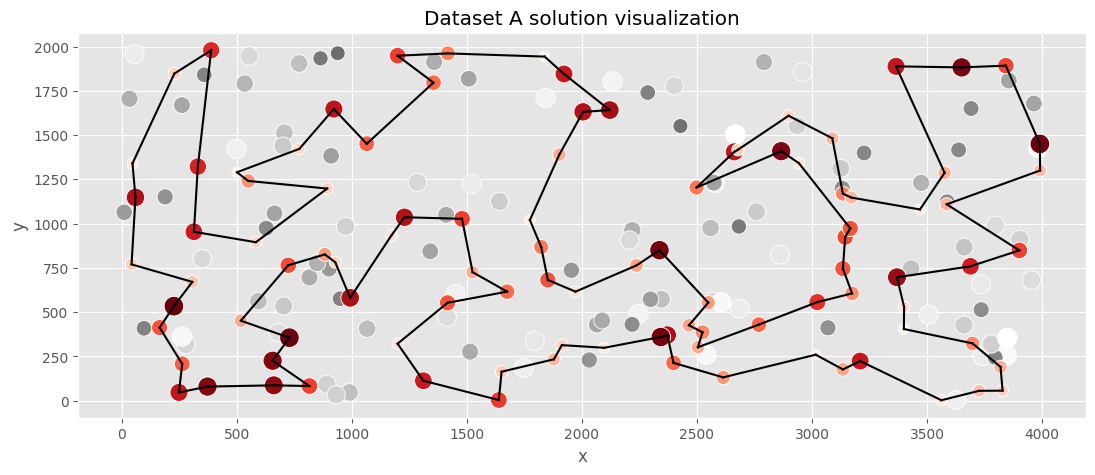

In [11]:
perform_experiment(
    ds_a,
    dm_a,
    "Dataset A solution visualization",
    init_greedy_2regret_weighted_cycle,
    w_regret=0.5,
    w_cost=0.5,
)

#### Dataset B

Best solution: [4, 149, 28, 20, 60, 148, 47, 94, 66, 179, 185, 86, 95, 130, 99, 166, 194, 113, 176, 103, 114, 137, 127, 89, 163, 187, 153, 81, 77, 141, 91, 61, 36, 78, 175, 162, 80, 190, 136, 73, 193, 31, 54, 117, 198, 156, 1, 27, 38, 135, 63, 40, 107, 133, 122, 90, 147, 51, 121, 25, 5, 177, 21, 82, 111, 8, 104, 138, 11, 139, 134, 6, 188, 169, 132, 70, 3, 155, 15, 145, 13, 195, 168, 33, 160, 29, 0, 109, 35, 143, 106, 124, 62, 18, 55, 34, 170, 152, 183, 140]
Objective function statistics:
minimum = 45453
mean = 46252.105
maximum = 47884


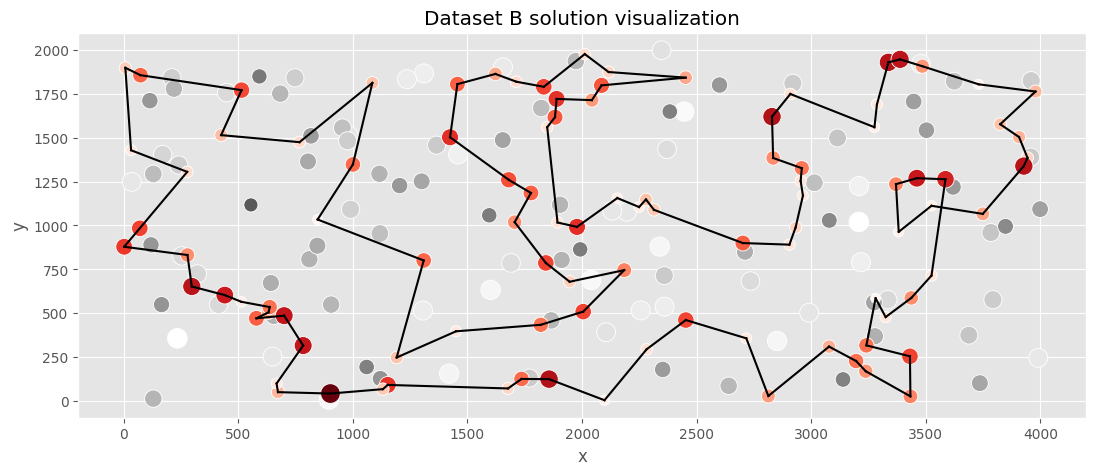

In [12]:
perform_experiment(
    ds_b,
    dm_b,
    "Dataset B solution visualization",
    init_greedy_2regret_weighted_cycle,
    w_regret=0.5,
    w_cost=0.5,
)

# Joint Results

#### Dataset A

In [54]:
a_res = pd.DataFrame(
    {
        "random_solution": [236601, 262859.735, 297066],
        "nn_last": [83182, 85108.51, 89433],
        "nn_best": [71114, 72871.87, 74875],
        "greedy_cycle": [71263, 72071.915, 73154],
        "greedy_2-regret": [105692, 115579.335, 126951],
        "greedy_weighted": [71057, 72218.32, 73587],
    },
    index=["min", "mean", "max"],
).T.sort_values("mean")

# a_res.style.background_gradient(
#     cmap="Blues",
#     subset=["mean"],
#     vmin=a_res["mean"].min() / 1.5,
#     vmax=a_res["mean"].max() / 2,
# )
a_res

,min,mean,max
greedy_cycle,71263.0,72071.915,73154.0
greedy_weighted,71057.0,72218.320,73587.0
nn_best,71114.0,72871.870,74875.0
nn_last,83182.0,85108.510,89433.0
greedy_2-regret,105692.0,115579.335,126951.0
random_solution,236601.0,262859.735,297066.0


#### Dataset B

In [55]:
b_res = pd.DataFrame(
    {
        "random_solution": [187699, 212675.575, 244471],
        "nn_last": [52319, 54390.43, 59030],
        "nn_best": [44762, 47575.555, 49919],
        "greedy_cycle": [45312, 46903.73, 48623],
        "greedy_2-regret": [67809, 72740.005, 78406],
        "greedy_weighted": [45453, 46252.105, 47884],
    },
    index=["min", "mean", "max"],
).T.sort_values("mean")
# b_res.style.background_gradient(
#     cmap="Blues",
#     subset=["mean"],
#     vmin=b_res["mean"].min() / 3,
#     vmax=b_res["mean"].max() / 3,
# )
b_res

,min,mean,max
greedy_weighted,45453.0,46252.105,47884.0
greedy_cycle,45312.0,46903.730,48623.0
nn_best,44762.0,47575.555,49919.0
nn_last,52319.0,54390.430,59030.0
greedy_2-regret,67809.0,72740.005,78406.0
random_solution,187699.0,212675.575,244471.0


# Conclusion
Pure regret didn't help to improve the score, while the weighted version worked situatively: on one dataset it improved mean, but got worse min solution and vv on the other.